In [2]:
# predicting salary based on the position using polynomial regression
# by nandita sajeev

# importing the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("Position_salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [17]:
# setting the dependent and independent variables
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

In [18]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [19]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [20]:
#splitting into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, random_state = 0)

In [25]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)



LinearRegression()

In [28]:
# Making predections
Y_pred = lin_reg.predict(x_test)

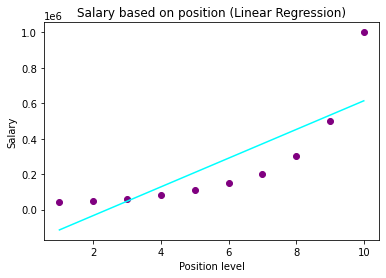

In [40]:
# Visualizing the Linear Regression results
plt.scatter(x, y, color='purple')
plt.plot(x, lin_reg.predict(x), color="Cyan")
plt.title('Salary based on position (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [38]:
# evaluating our model usinf r2_score
from sklearn.metrics import r2_score
r2_score(y_test, Y_pred)

0.7014192482188104

In [46]:
# to improve the efficiency of the model we will use polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y)

LinearRegression()

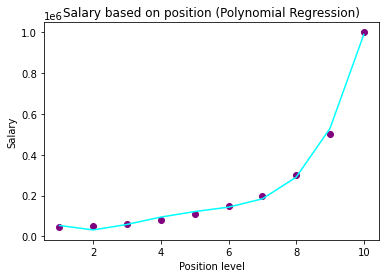

In [47]:
# Visualizing the Polymonial Regression results
plt.scatter(x, y, color='purple')
plt.plot(x, pol_reg.predict(poly_reg.fit_transform(x)), color='cyan')
plt.title('Salary based on position (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [49]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])

array([249500.])

In [52]:
# Predicting a new result with Polymonial Regression
y_poly_pred = pol_reg.predict(poly_reg.fit_transform([[5.5]]))
print(y_poly_pred)

[132148.43750003]


In [ ]:
# hence polynomial regression makes a better prediction